In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [ ]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [ ]:
df.shape

(400, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
corr=df.corr()

<ipython-input-8-0014364bc22a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


In [ ]:
corr

,User ID,Age,EstimatedSalary,Purchased
User ID,1.000000,-0.000721,0.071097,0.007120
Age,-0.000721,1.000000,0.155238,0.622454
EstimatedSalary,0.071097,0.155238,1.000000,0.362083
Purchased,0.007120,0.622454,0.362083,1.000000


<Axes: >

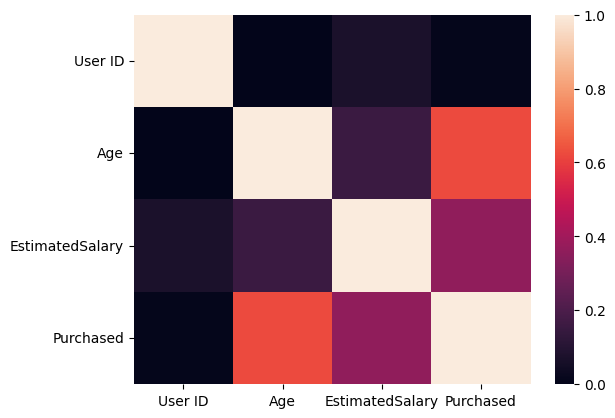

In [ ]:
sns.heatmap(corr)

<Axes: xlabel='Age', ylabel='count'>

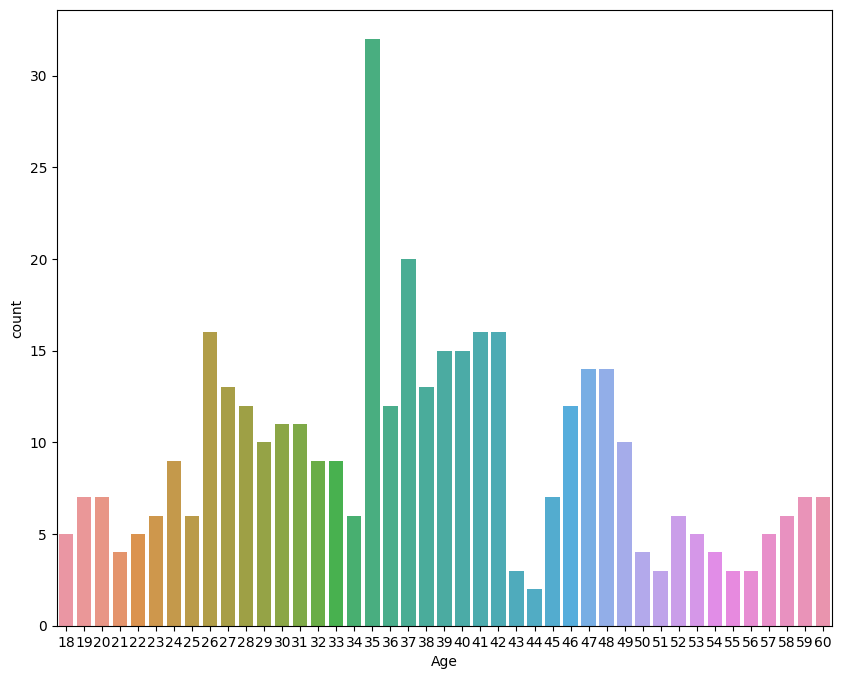

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x='Age' ,data=df)

<Axes: xlabel='Purchased', ylabel='count'>

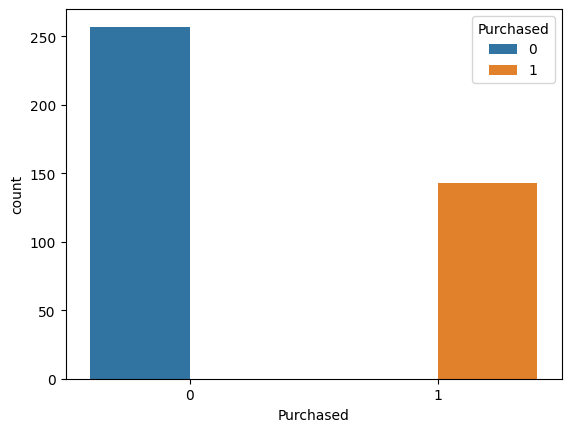

In [27]:
sns.countplot(x="Purchased",hue='Purchased', data=df)

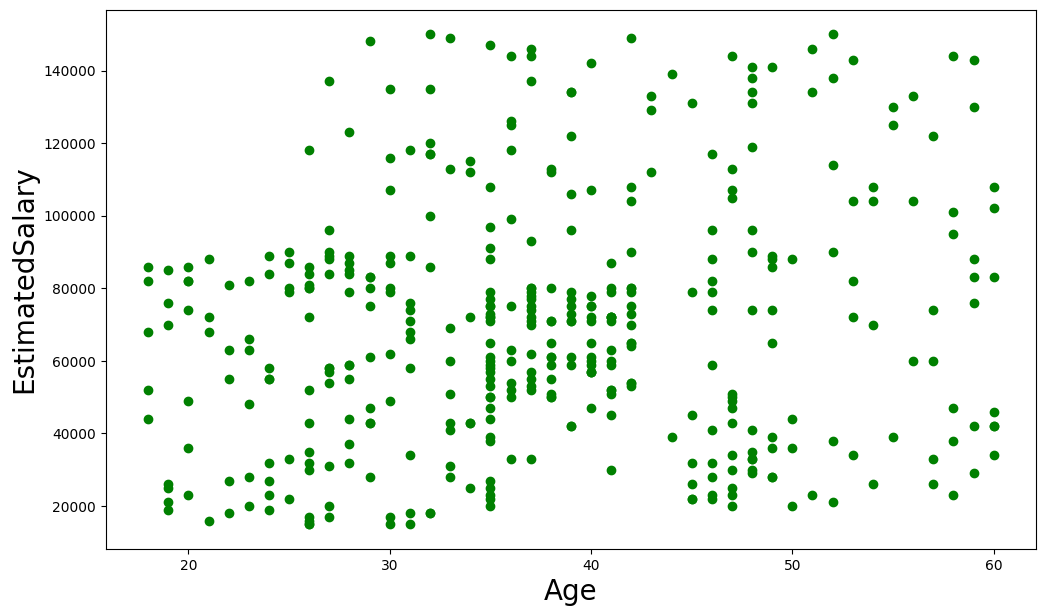

In [29]:
plt.figure(figsize=(12,7))
plt.scatter(df['Age'],df['EstimatedSalary'] , color='g')
plt.xlabel('Age', fontsize=20)
plt.ylabel('EstimatedSalary', fontsize=20)
plt.show()

In [31]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values
X.shape , y.shape

((400, 4), (400,))

In [32]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.8, random_state=0)

In [34]:
from sklearn.preprocessing import StandardScaler
std =StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf' , random_state=0)
classifier.fit(X_train , y_train)

SVC(random_state=0)

In [40]:
print(classifier.predict(std.transform([[30,20000,50,40000]])))

[1]


In [41]:
y_pred=classifier.predict(std.transform(X_test))
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
y_pred=classifier.predict(std.transform(X_test))
result= np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

In [43]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test , y_pred)
cm

array([[  0, 201],
       [  0, 119]])

In [44]:
accuracy_score(y_pred ,y_test)

0.371875

In [ ]:
from sklearn import preprocessing

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]


In [ ]:
x = df.drop(['User ID','Purchased'], axis = 1)
y = df['Purchased']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.1, random_state=0)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
classifier = GaussianNB()

In [ ]:
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [ ]:
print(accuracy_score(y_test, y_pred))

0.95


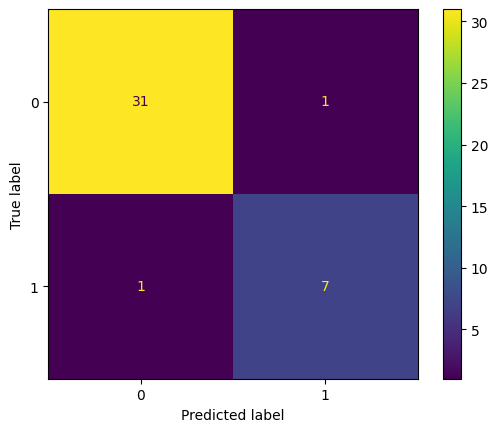

In [ ]:
cm=confusion_matrix (y_test , y_pred )
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp. plot ( )
plt. show()

In [ ]:
print (classification_report (y_test, y_pred) )

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        32
           1       0.88      0.88      0.88         8

    accuracy                           0.95        40
   macro avg       0.92      0.92      0.92        40
weighted avg       0.95      0.95      0.95        40

